Cada semana, Spotify actualiza sus listas de las 50 canciones más populares para cada país. Este conjunto de datos incluye la lista de cada país correspondiente a la semana 45 de 2023 (del 6 de noviembre al 12 de noviembre). Hay 73 países disponibles.

El conjunto de datos tiene una columna para cada aspecto musical de cada canción, así como el nombre, el país, el artista y la fecha de publicación de la pista.

Con estos datos se podría tener información como preferencias de escucha por paises, para dar feedback a músicos y artista, recomendaciones ML, tipos de anuncios, etc...

Datos extraídos de la API oficial de Spotify.

*Datos extraidos de Kaggle: [+ Info](https://www.kaggle.com/datasets/miquelneck/worlds-spotify-top-50-playlist-musicality-data/data)

# Breve Análisis del Contenido Hablado en Canciones Escuchadas en Europa

Este informe explora el contenido hablado, **Speechiness**, en canciones escuchadas en Europa, con el objetivo de identificar tendencias y patrones en la música a lo largo del tiempo y en diferentes regiones. Se analizan diversas relaciones, tales como:

- **Speechiness vs. Duración a lo largo de los años en Europa**: Analizamos cómo ha evolucionado el contenido hablado en las canciones en función de su duración a lo largo de los años en Europa.
- **Speechiness vs. Emoción (Mode)**: Estudiamos cómo el contenido hablado varía según el modo musical (mayor o menor), lo que refleja el tono emocional de las canciones.
- **Speechiness por País**: Se examina cómo varía el contenido hablado en función de los países europeos, para identificar posibles diferencias regionales en la música.
- **Speechiness vs. Danceability**: Se investiga la relación entre el contenido hablado y la capacidad de las canciones para ser bailables.

Este análisis ofrece una visión amplia sobre cómo se distribuye el contenido hablado en la música y cómo se relaciona con diferentes características de las canciones en Europa.


Datos extraídos de la API oficial de Spotify.

*Data Set de Kaggle: [+ Info](https://www.kaggle.com/datasets/miquelneck/worlds-spotify-top-50-playlist-musicality-data/data)*

In [2]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Cargar los datos de Spotify
df = pd.read_csv("/content/sample_data/Top-50-musicality-global.csv")
#df.info()
print("Resumen básico: ", f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}, Tipos: {df.dtypes.value_counts().to_dict()}")
#print("Resumen columnas y datos tipo: ", df.agg(['dtype', lambda x: x.isnull().sum()]).T.rename(columns={'dtype': 'Tipo', '<lambda_0>': 'Nulos'}))


Resumen básico:  Filas: 3589, Columnas: 21, Tipos: {dtype('float64'): 9, dtype('int64'): 6, dtype('O'): 6}


### 1.1 Visualización de los Datos

En esta sección se realiza una visualización inicial del dataset para comprender su estructura y contenido. Esta visualización permite identificar rápidamente aspectos como el número de filas y columnas, tipos de datos, y posibles valores faltantes (`NaN`).


In [3]:
df.describe(include= "all")

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
count,3589.000000,3589,3583,3583,3583,3589.000000,3589,3583,3589.000000,3589.000000,...,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000
unique,NaN,72,1841,1157,1545,NaN,590,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Global,greedy,Bad Bunny,nadie sabe lo que va a pasar mañana,NaN,2023-10-13,AR,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,50,44,163,153,NaN,221,3527,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1794.000000,NaN,NaN,NaN,NaN,78.451101,NaN,NaN,0.688079,0.285637,...,0.646463,0.019187,5.348008,0.171895,-6.616918,0.503483,0.105122,121.027742,3.906659,0.528968
std,1036.199386,NaN,NaN,NaN,NaN,15.242710,NaN,NaN,0.135642,0.258611,...,0.163505,0.094564,3.494953,0.123540,2.658782,0.500058,0.097852,27.624052,0.433971,0.228932
min,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.244000,0.000008,...,0.024200,0.000000,0.000000,0.015400,-19.518000,0.000000,0.023200,60.038000,1.000000,0.037300
25%,897.000000,NaN,NaN,NaN,NaN,67.000000,NaN,NaN,0.596000,0.079600,...,0.543000,0.000000,2.000000,0.097400,-8.065000,0.000000,0.039900,99.904000,4.000000,0.359000
50%,1794.000000,NaN,NaN,NaN,NaN,83.000000,NaN,NaN,0.706000,0.188000,...,0.669000,0.000001,5.000000,0.120000,-6.238000,1.000000,0.063300,118.024000,4.000000,0.524000
75%,2691.000000,NaN,NaN,NaN,NaN,90.000000,NaN,NaN,0.795000,0.441000,...,0.762000,0.000089,8.000000,0.214000,-4.813000,1.000000,0.131000,139.945000,4.000000,0.720000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3589 non-null   int64  
 1   Country           3589 non-null   object 
 2   Track Name        3583 non-null   object 
 3   Artist Name       3583 non-null   object 
 4   Album Name        3583 non-null   object 
 5   Popularity        3589 non-null   int64  
 6   Date              3589 non-null   object 
 7   Markets           3583 non-null   object 
 8   Danceability      3589 non-null   float64
 9   Acousticness      3589 non-null   float64
 10  duration          3589 non-null   int64  
 11  Energy            3589 non-null   float64
 12  Instrumentalness  3589 non-null   float64
 13  Key               3589 non-null   int64  
 14  Liveness          3589 non-null   float64
 15  Loudness          3589 non-null   float64
 16  Mode              3589 non-null   int64  


In [5]:
# Mostrar las primeras 5 filas
print("Primeras filas del DataFrame:")
print(df.head(3))

# Separación visual
print("\n" + "*" * 266 + "\n")  # Imprime una línea de asteriscos

# Mostrar las últimas 5 filas
print("Últimas filas del DataFrame:")
print(df.tail(3))


Primeras filas del DataFrame:
   Unnamed: 0 Country            Track Name     Artist Name   Album Name  \
0           0  Global  Standing Next to You       Jung Kook       GOLDEN   
1           1  Global                greedy      Tate McRae       greedy   
2           2  Global           Si No Estás  iñigo quintero  Si No Estás   

   Popularity        Date Markets  Danceability  Acousticness  ...  Energy  \
0          91  2023-11-03      AR         0.711        0.0447  ...   0.809   
1         100  2023-09-15      AR         0.750        0.2560  ...   0.733   
2          99  2022-09-23      AR         0.537        0.8270  ...   0.421   

   Instrumentalness  Key  Liveness  Loudness  Mode  Speechiness    Tempo  \
0               0.0    2     0.339    -4.389     0       0.0955  106.017   
1               0.0    6     0.114    -3.180     0       0.0319  111.018   
2               0.0    5     0.138    -8.720     1       0.0285   98.224   

   TSignature  Positiveness  
0           4    

### 1.2 Porcentaje de NaN por Columna

La mayoría de las columnas no presentan un porcentaje de `NaN` muy representativo, por lo que podemos asumir la desviación. Sin embargo, la columna **Date** tiene un amplio porcentaje de `NaN` (casi un 60%), y el rango de fechas abarca aproximadamente **81 años** en lugar de una semana, lo cual hace que este dato no sea consistente.

Dejamos de momento este valor, por si se encuentra algún patrón a posteriori.


In [6]:
# Calcular el porcentaje de NaN en todas las columnas, incluyendo 'Date'
porcentaje_nan = df.isnull().mean() * 100

# Filtrar solo las columnas con NaN y ordenarlas en orden descendente
porcentaje_nan = porcentaje_nan[porcentaje_nan > 0].sort_values(ascending=False)

# Imprimir el porcentaje de NaN de todas las columnas con valores faltantes
print("Porcentaje de NaN en todas las columnas con valores faltantes:")
print(porcentaje_nan)

Porcentaje de NaN en todas las columnas con valores faltantes:
Track Name     0.167177
Artist Name    0.167177
Album Name     0.167177
Markets        0.167177
dtype: float64


In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')# Convertir la columna 'Date' a datetime, estableciendo NaT en valores no convertibles

print("Valores NaT en 'Date':", df['Date'].isna().sum())# Contar valores NaT (nulos) en la columna 'Date'
print("Fecha mínima:", df['Date'].min())
print("Fecha máxima:", df['Date'].max())

Valores NaT en 'Date': 21
Fecha mínima: 1942-01-01 00:00:00
Fecha máxima: 2023-11-08 00:00:00


In [8]:
# Definir el rango de fechas para la semana 45 de 2023
fecha_inicio = '2023-11-06'
fecha_fin = '2023-11-12'

# Filtrar fechas dentro del rango y contar
fechas_en_semana_45 = df['Date'].between(fecha_inicio, fecha_fin).sum()
print(f"Fechas dentro de la semana 45 de 2023: {fechas_en_semana_45}")

# Contar las fechas que están fuera del rango especificado
fechas_fuera_semana_45 = (~df['Date'].between(fecha_inicio, fecha_fin)).sum()

print(f"Fechas fuera de la semana 45 de 2023: {fechas_fuera_semana_45}")

Fechas dentro de la semana 45 de 2023: 8
Fechas fuera de la semana 45 de 2023: 3581


## 2. Limpieza y Preprocesamiento de Datos

Los datos están bastante limpios, pero realizaré algunos cambios de tipos y formato como práctica:

- **Convertir la columna de duración** al formato `hh:mm:ss`.


2.1 Cambiar el Formato de `ms` a `hh:mm:ss` en la Columna `duration`

Se convierte la columna `duration`, que está en milisegundos (`ms`), al formato `hh:mm:ss` para mejorar la legibilidad.


In [9]:
# Convertir la columna 'duration' de milisegundos a timedelta y redondear al segundo más cercano
df['duration_hhmmss'] = pd.to_timedelta(df['duration'], unit='ms').round('s')

# Aplicar formato hh:mm:ss para todos los valores
df['duration_hhmmss'] = df['duration_hhmmss'].apply(lambda x: (pd.Timestamp(0) + x).strftime('%H:%M:%S'))

# Mostrar el resultado
print(df[['duration', 'duration_hhmmss']])


      duration duration_hhmmss
0       206020        00:03:26
1       131872        00:02:11
2       184061        00:03:04
3       183551        00:03:03
4       229478        00:03:49
...        ...             ...
3584    175912        00:02:55
3585    133562        00:02:13
3586    179164        00:02:59
3587    167247        00:02:47
3588    234000        00:03:54

[3589 rows x 2 columns]



# 3. Análisis Exploratorio de Datos (EDA)


# SPEECHINESS VS DURACIÓN A LO LARGO DE LOS AÑOS EN EUROPA

El análisis de **Speechiness** y **Duración** a lo largo de los años en Europa examina cómo ha evolucionado el contenido hablado en las canciones en función de su duración. Se observa la tendencia del contenido hablado en relación con la duración en diferentes periodos.


<ipython-input-10-890b211013c4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europa['Año'] = df_europa['Date'].dt.year


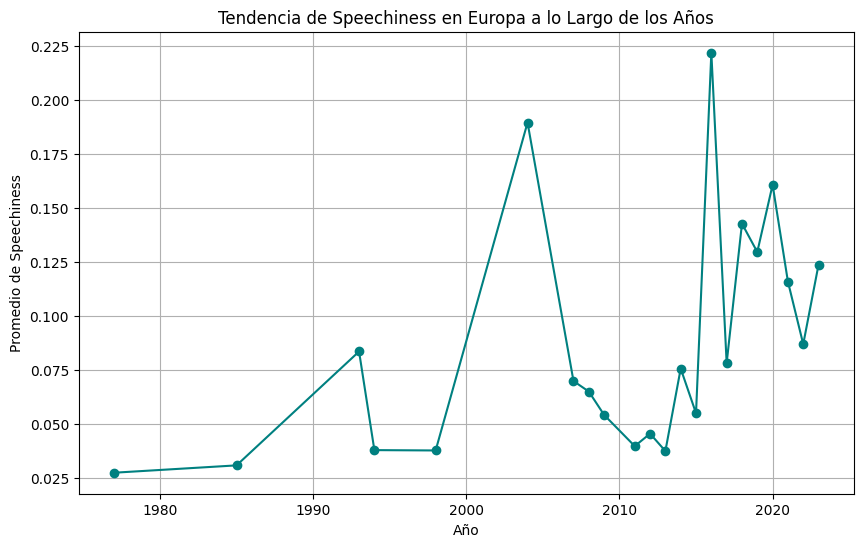

In [10]:
# Convertir la columna 'Date' a formato datetime si no está ya en ese formato
df['Date'] = pd.to_datetime(df['Date'])

# Lista de códigos ISO Alpha-3 de países europeos
paises_europeos_alpha3 = [
    'ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST',
    'FIN', 'FRA', 'GEO', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'KAZ', 'LVA', 'LIE', 'LTU',
    'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR',
    'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TUR', 'UKR', 'GBR', 'VAT'
]

# Filtrar solo países europeos
df_europa = df[df['Country'].isin(paises_europeos_alpha3)]

# Crear una columna de año
df_europa['Año'] = df_europa['Date'].dt.year

# Calcular el promedio de Speechiness por año
speechiness_anual = df_europa.groupby('Año')['Speechiness'].mean()

# Visualizar la tendencia de Speechiness a lo largo de los años
plt.figure(figsize=(10, 6))
speechiness_anual.plot(kind='line', marker='o', color='teal')
plt.title('Tendencia de Speechiness en Europa a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Promedio de Speechiness')
plt.grid(True)
plt.show()



# SPEECHINESS POR PAÍS EUROPEO

El análisis de **Speechiness** por país examina cómo varía el contenido hablado en las canciones según el país de origen. Se compara el promedio de `Speechiness` en diferentes países para identificar tendencias regionales en el contenido hablado de las canciones.


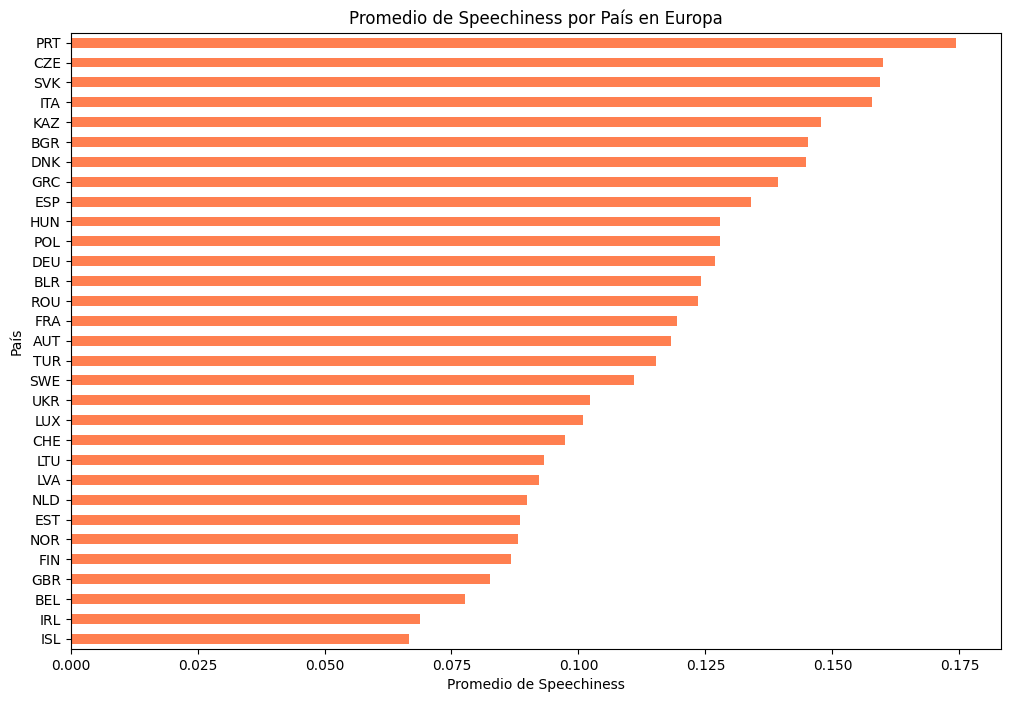

In [11]:
# Calcular el promedio de Speechiness por país europeo
speechiness_por_pais = df_europa.groupby('Country')['Speechiness'].mean().sort_values()

# Visualizar el promedio de Speechiness por país
plt.figure(figsize=(12, 8))
speechiness_por_pais.plot(kind='barh', color='coral')
plt.title('Promedio de Speechiness por País en Europa')
plt.xlabel('Promedio de Speechiness')
plt.ylabel('País')
plt.show()



# SPEECHINESS VS DANCEABILITY

El análisis de **Speechiness** y **Danceability** examina cómo varía el contenido hablado en función de la capacidad de la canción para ser bailable. Se categorizan las canciones según su danceability y se estudia su relación con el contenido hablado.

<ipython-input-12-f7530a43e336>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Danceability_cat', y='Speechiness', data=df, palette='Set2')


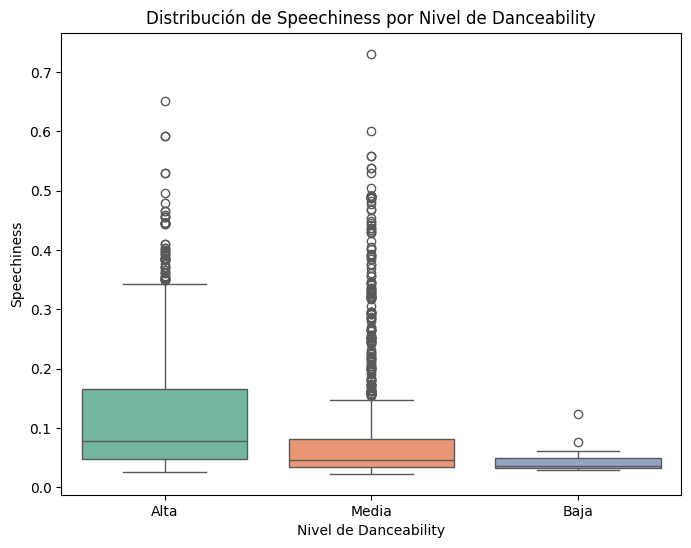

In [12]:
# Definir una función para categorizar Danceability
def categorizar_danceability(valor):
    if valor < 0.33:
        return 'Baja'
    elif valor < 0.66:
        return 'Media'
    else:
        return 'Alta'

# Aplicar la categorización de Danceability
df['Danceability_cat'] = df['Danceability'].apply(categorizar_danceability)

# Crear el gráfico de Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Danceability_cat', y='Speechiness', data=df, palette='Set2')

# Añadir título y etiquetas
plt.title('Distribución de Speechiness por Nivel de Danceability')
plt.xlabel('Nivel de Danceability')
plt.ylabel('Speechiness')

# Mostrar el gráfico
plt.show()


# SPEECHINESS VS EMOCIÓN

El análisis de **Speechiness** y **Emoción (Mode)** explora cómo el contenido hablado varía según la modalidad de la canción (mayor o menor). Se estudia la relación entre el contenido hablado y el tono emocional de las canciones.


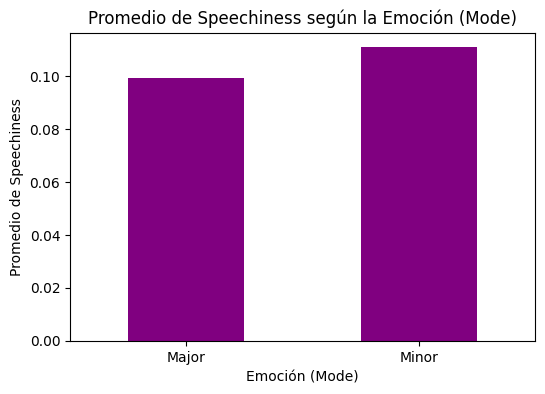

In [13]:
import matplotlib.pyplot as plt

# Crear una columna categórica basada en el valor de Mode
df['Mode_cat'] = df['Mode'].apply(lambda x: 'Major' if x == 1 else 'Minor')

# Calcular el promedio de Speechiness por cada modo (Major/Minor)
promedio_speechiness_mode = df.groupby('Mode_cat')['Speechiness'].mean()

# Visualizar el promedio de Speechiness por emoción (Mode)
plt.figure(figsize=(6, 4))
promedio_speechiness_mode.plot(kind='bar', color='purple')
plt.title('Promedio de Speechiness según la Emoción (Mode)')
plt.xlabel('Emoción (Mode)')
plt.ylabel('Promedio de Speechiness')
plt.xticks(rotation=0)
plt.show()


# SPEECHINESS VS DURATION
El análisis de **Speechiness** y **Duración** permite explorar la relación entre el contenido hablado de una canción y su longitud. Se categorizan las canciones en función de su duración, y se analiza cómo varía el contenido hablado según esta clasificación.


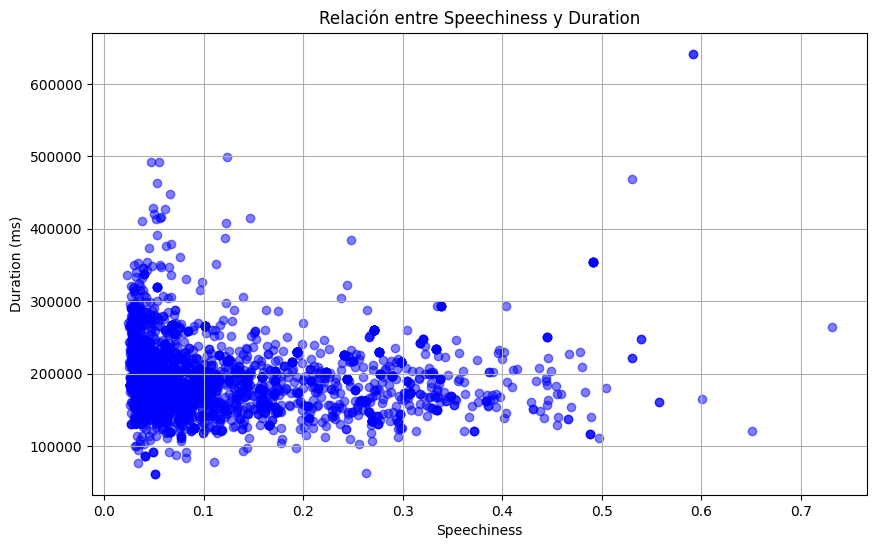

In [14]:
# Asegurarse de que la columna 'duration' esté en formato numérico si no lo está
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Crear el gráfico de dispersión entre Speechiness y Duration
plt.figure(figsize=(10, 6))
plt.scatter(df['Speechiness'], df['duration'], alpha=0.5, color='blue')
plt.title('Relación entre Speechiness y Duration')
plt.xlabel('Speechiness')
plt.ylabel('Duration (ms)')
plt.grid(True)
plt.show()


# 4. Guardar el Dataset Final

In [15]:
df.to_csv("/content/sample_data/Contendio_hablado_canciones_Europa.csv", index=False)